In [265]:
import pandas as pd

In [266]:
df = pd.read_csv('data.csv')


In [267]:
df = df.drop(['date','waterfront','view','street','statezip','country','yr_renovated',],axis='columns')

In [268]:
"""contoh fungsi jika square fot 1666 - 2567"""
"""def convert(x):
    tokens = x.split('-')
    iflen(tokens) ==2 :
        return (float(tokens[0) + float(tokens[1])) /2
    try
        return float(x)
    except:
        return none"""
"""digunakan untuk menghapus space tiap kata
df = df.location.applu(labda x : x.strip())"""

'digunakan untuk menghapus space tiap kata\ndf = df.location.applu(labda x : x.strip())'

In [269]:
df.city = df.city.apply(lambda x: x.replace(" ",""))
df.city = df.city.apply(lambda x: x.replace("-",""))

In [270]:
city = df.groupby('city')['city'].agg('count').sort_values(ascending=False)

In [271]:
"""tonton codebasic feature enggeiner

len(city[city <= 10])
lessthan10 = city[city <= 10]
df.city = df.city.apply(lambda x: 'other' if x in lessthan10 else x) """

"tonton codebasic feature enggeiner\n\nlen(city[city <= 10])\nlessthan10 = city[city <= 10]\ndf.city = df.city.apply(lambda x: 'other' if x in lessthan10 else x) "

In [272]:
len(df.city.unique())

44

In [273]:
bathmore5 = df.loc[df['bathrooms'] >= 5 ]

In [274]:
import numpy as np
df.bathrooms = np.round(df.bathrooms, decimals=0)


In [275]:
df['bhk'] = df.bedrooms + df.bathrooms
df.shape

(4600, 12)

In [276]:
df2 = df[(df.sqft_living/df.bhk < 400)]
df2.shape

(2891, 12)

In [277]:
df2.price.describe()

count    2.891000e+03
mean     4.349711e+05
std      5.298879e+05
min      0.000000e+00
25%      2.850000e+05
50%      3.949500e+05
75%      5.250000e+05
max      2.659000e+07
Name: price, dtype: float64

In [278]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('city'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_outlier(df2)
df3.shape


(2265, 12)

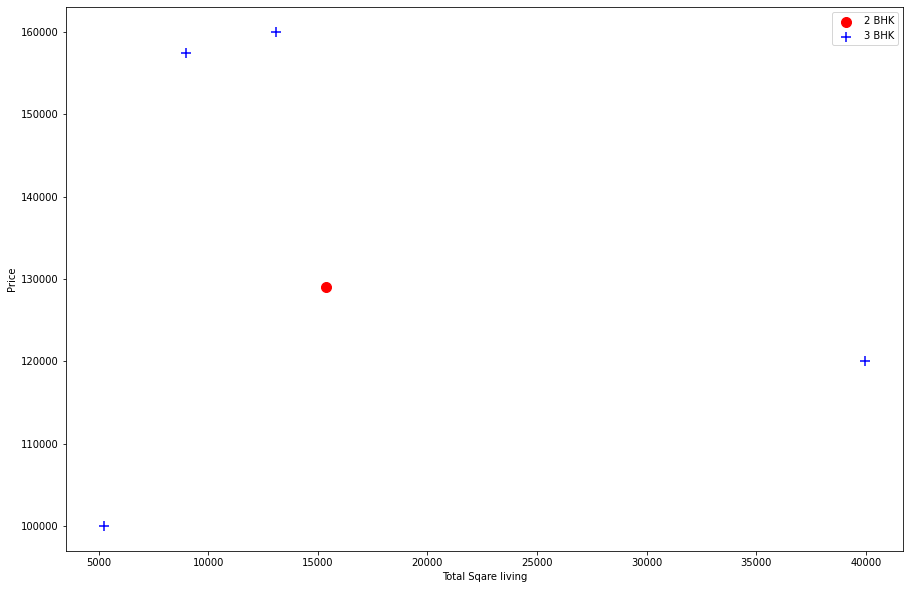

In [279]:
import matplotlib.pyplot as plt
def plot_scatter(df,city):
    bhk2 = df[(df.city == city) & (df.bhk == 2)]
    bhk3 = df[(df.city == city) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.sqft_lot,bhk2.price,color='red',label="2 BHK",s=100)
    plt.scatter(bhk3.sqft_lot,bhk3.price,color='blue',label="3 BHK",marker='+',s=100)
    plt.xlabel("Total Sqare living")
    plt.ylabel("Price")
    plt.legend()
plot_scatter(df3,"Kent")

Text(0, 0.5, 'count')

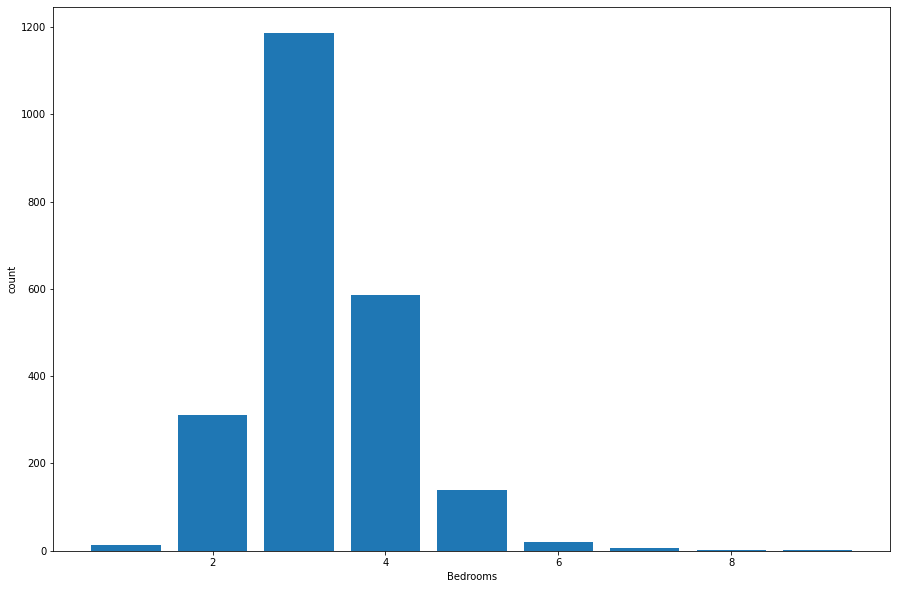

In [280]:
bedroms = df3.groupby('bedrooms')['bedrooms'].agg('count')
bedromsname = bedroms.index
plt.bar(bedromsname,bedroms)
plt.xlabel("Bedrooms")
plt.ylabel("count")

In [281]:
dummies = pd.get_dummies(df3.city)
dummies.head(3)

,Algona,Auburn,Bellevue,BlackDiamond,Bothell,Burien,Carnation,Covington,DesMoines,Duvall,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [282]:
dummies = dummies.drop(['Woodinville'],axis='columns')

In [283]:
df4 = pd.concat([df3,dummies],axis='columns')

In [284]:
df4 = df4.drop(['city','sqft_lot','sqft_above','sqft_basement','yr_built','bhk'],axis='columns')
df4.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,Algona,Auburn,Bellevue,BlackDiamond,...,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon
0,262000.0,4.0,2.0,2020,2.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,230000.0,3.0,1.0,1390,1.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,248000.0,4.0,3.0,2163,2.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,196440.0,3.0,2.0,1560,1.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,245000.0,3.0,2.0,1920,1.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
X = df4.drop('price',axis='columns')


In [286]:
y = df4.price

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [288]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)



0.6607376638959261

In [289]:
"""from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train_scaled = ss.fit_transform(y_train)
y_test_scaled = ss.transform(y_test.values.reshape(-1,1))
lr.fit(X_train_scaled,y_train_scaled)
lr.score(X_test_scaled,y_test_scaled) """

'from sklearn.preprocessing import StandardScaler\nss = StandardScaler()\nX_train_scaled = ss.fit_transform(X_train)\nX_test_scaled = ss.transform(X_test)\ny_train_scaled = ss.fit_transform(y_train)\ny_test_scaled = ss.transform(y_test.values.reshape(-1,1))\nlr.fit(X_train_scaled,y_train_scaled)\nlr.score(X_test_scaled,y_test_scaled) '

In [290]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.656675  , 0.65913668, 0.67913683, 0.67608681, 0.66634829])

In [291]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


algos = {
        'linear regression' : {
            'model' : LinearRegression(),
            'params' : {
                    'normalize' : [True,False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic'],
                'tol' : [100]
            }
        },
        'decision tree' : {
            'model' :  DecisionTreeRegressor(),
        'params' : {
            'criterion' : ['mse','friedman_mse'],
            'splitter' : ['best','random']
            }
        }
    }

In [292]:
from sklearn.model_selection import GridSearchCV
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
score = []

for algo_name,config in algos.items():
    clf = GridSearchCV(config['model'],config['params'],cv = cv,
                       return_train_score=False)
    clf.fit(X,y)
    score.append({
        'model' : algo_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })


In [293]:
data = pd.DataFrame(score,columns=['model','best_score','best_params'])
data


,model,best_score,best_params
0,linear regression,0.667477,{'normalize': False}
1,lasso,0.619540,"{'alpha': 2, 'selection': 'cyclic', 'tol': 100}"
2,decision tree,0.403428,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [294]:
def predict(location,bedrooms,bathrooms,sqft,floors,condition):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = sqft
    x[3] = floors
    x[4] = condition
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [295]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'Algona',
       'Auburn', 'Bellevue', 'BlackDiamond', 'Bothell', 'Burien', 'Carnation',
       'Covington', 'DesMoines', 'Duvall', 'Enumclaw', 'FallCity',
       'FederalWay', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland',
       'LakeForestPark', 'MapleValley', 'MercerIsland', 'Milton', 'Newcastle',
       'NormandyPark', 'NorthBend', 'Pacific', 'Redmond', 'Renton',
       'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish',
       'Snoqualmie', 'Tukwila', 'Vashon'],
      dtype='object')

In [296]:
np.where(X.columns == 'SeaTac')[0][0]

33

In [301]:
predict('NorthBend',2,2,2000,2,4)

433703.4152473364

In [302]:
predict('NorthBend',1,1,2000,2,4)

444391.9293102795

In [303]:
import pickle
with open('house_model_pickle','wb') as f:
    pickle.dump(lr,f)

In [306]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))